## Loading and pre- processing image data

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [20]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

In [21]:
x_test.shape

(10000, 28, 28)

8


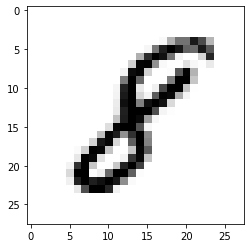

In [23]:
image_index=7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Define model's architecture

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## Training the model

In [27]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 11s 87ms/step - loss: 0.4378 - accuracy: 0.8761
Epoch 2/10
118/118 [==============================] - 10s 85ms/step - loss: 0.1733 - accuracy: 0.9493
Epoch 3/10
118/118 [==============================] - 11s 89ms/step - loss: 0.1206 - accuracy: 0.9650
Epoch 4/10
118/118 [==============================] - 11s 90ms/step - loss: 0.0902 - accuracy: 0.9729
Epoch 5/10
118/118 [==============================] - 11s 92ms/step - loss: 0.0720 - accuracy: 0.9787
Epoch 6/10
118/118 [==============================] - 10s 85ms/step - loss: 0.0583 - accuracy: 0.9827
Epoch 7/10
118/118 [==============================] - 10s 88ms/step - loss: 0.0509 - accuracy: 0.9853
Epoch 8/10
118/118 [==============================] - 11s 91ms/step - loss: 0.0438 - accuracy: 0.9862
Epoch 9/10
118/118 [==============================] - 11s 91ms/step - loss: 0.0391 - accuracy: 0.9881
Epoch 10/10
118/118 [==============================] - 10s 87ms/step - loss: 0.033

## Estimating the model's performance

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9850
Test Loss: 0.04565919190645218, Test Accuracy: 0.9850000143051147


In [29]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


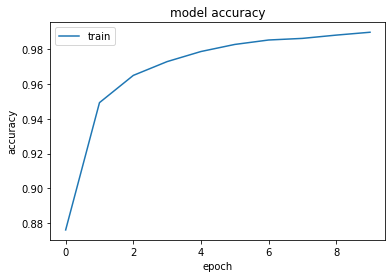

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

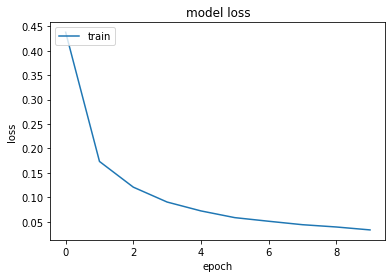

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 115ms/step
9


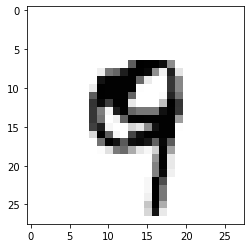

In [32]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())